In [148]:
from __future__ import division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [111]:
X = np.random.permutation(np.load("mnist.npy"))/255

In [170]:
def AE(X,k,n_dim, learning_rate = 0.01):
  
    X_ = tf.contrib.layers.flatten(X)
    hidden = tf.layers.dense(X_, k)
    outputs = tf.layers.dense(hidden, n_dim**2)
    final_outputs = tf.reshape(outputs, [-1,n_dim,n_dim])

    loss = tf.reduce_mean(tf.square(final_outputs - X))

    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(loss)

    
    return train, final_outputs, loss, hidden
    
def train_AE(X_data, epochs = 10, learning_rate= 0.01, batch = 30, k = 2, visualize = True, interpolate = True, render_normal = True):
    
    X_tr, X_val = train_test_split(X_data,test_size = 0.1)
    n_trn, n_dim = X_tr.shape[0], X_tr.shape[1]
    
    with tf.Graph().as_default():
        training = tf.placeholder(tf.bool)
        X = tf.placeholder(tf.float32, [None, n_dim, n_dim], name="X")
        
        train, final_outputs, loss, hidden = AE(X, k, n_dim, learning_rate)
        init = tf.global_variables_initializer()

        with tf.Session() as sess:
            sess.run(init)
            for i in range(epochs):
                perms = np.array_split(np.random.permutation(n_trn),n_trn/batch)
                for perm in perms:
                    train.run(feed_dict={X: X_tr[perm]})
                    loss_tr = loss.eval(feed_dict={X: X_tr[perm]})
                    
                loss_val = loss.eval(feed_dict={X: X_val})
                print("Epoch = ",i ," loss train = ", loss_tr," loss val = ", loss_val)
              
            if visualize == True:
                
                images = []
                images.append(final_outputs.eval(feed_dict={X : X_tr[:10]}))
                images.append(final_outputs.eval(feed_dict={X : X_val[:10]}))
                images.append(X_tr[:10])
                images.append(X_val[:10])
                
                for (ind,im) in enumerate(images):
                    plt.figure(figsize=(20,10))
                    for i in range(10):
                        plt.subplot(2,5,i+1)
                        plt.imshow(im[i])
                    
                    print "10 First " + (ind == 0)*"train" + (ind == 1)*"val"+ (ind == 2)*"real train" + (ind == 3)*"real val" + " images, k ="+str(k)
                    plt.savefig("visualize_"+(ind == 0)*"train" + (ind == 1)*"val"+ (ind == 2)*"real train" + (ind == 3)*"real val"+"_.png", bbox_inches='tight')
            
            if interpolate == True:
                
                codes = []
                codes.append(hidden.eval(feed_dict={X : X_tr[:10]}))
                codes.append(hidden.eval(feed_dict={X : X_val[:10]}))
                
                for i in range(10):
                    plt.figure(figsize=(20,10))
                    for j in range(10):
                        code_inter = codes[0][i] + (j/9)*(codes[1][i] - codes[0][i])
                        image = final_outputs.eval(feed_dict={hidden : np.expand_dims(code_inter,0)})
                        plt.subplot(2,5,j+1)
                        plt.imshow(image[0])
                    plt.savefig('interpolate.png', bbox_inches='tight')
        
            if render_normal == True:
                
                codes = np.random.normal(size = [10,100])
                images = final_outputs.eval(feed_dict = {hidden: codes})

                plt.figure(figsize=(20,10))
                for i in range(10):
                    plt.subplot(2,5,i+1)
                    plt.imshow(images[i])
                plt.savefig('render_normal.png', bbox_inches='tight')
                    
            
    


('Epoch = ', 0, ' loss train = ', 0.051413514, ' loss val = ', 0.051921926)
('Epoch = ', 1, ' loss train = ', 0.056800023, ' loss val = ', 0.051781338)
('Epoch = ', 2, ' loss train = ', 0.053693239, ' loss val = ', 0.052106235)
('Epoch = ', 3, ' loss train = ', 0.050993063, ' loss val = ', 0.051966902)
('Epoch = ', 4, ' loss train = ', 0.046690784, ' loss val = ', 0.05198412)
('Epoch = ', 5, ' loss train = ', 0.055500135, ' loss val = ', 0.052032612)
('Epoch = ', 6, ' loss train = ', 0.050453849, ' loss val = ', 0.051931825)
('Epoch = ', 7, ' loss train = ', 0.055264864, ' loss val = ', 0.051806804)
('Epoch = ', 8, ' loss train = ', 0.049474455, ' loss val = ', 0.051847912)
('Epoch = ', 9, ' loss train = ', 0.057231929, ' loss val = ', 0.051867101)
10 First train images, k =2


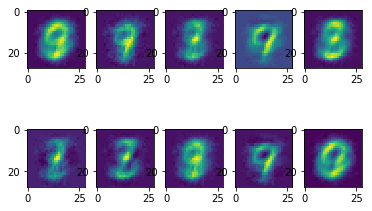

10 First val images, k =2


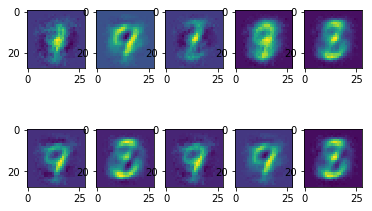

In [106]:
train_AE(X)

('Epoch = ', 0, ' loss train = ', 0.019337438, ' loss val = ', 0.023764582)
('Epoch = ', 1, ' loss train = ', 0.020738039, ' loss val = ', 0.02345109)
('Epoch = ', 2, ' loss train = ', 0.020897988, ' loss val = ', 0.023578765)
('Epoch = ', 3, ' loss train = ', 0.019664926, ' loss val = ', 0.02326059)
('Epoch = ', 4, ' loss train = ', 0.022002079, ' loss val = ', 0.023584595)
('Epoch = ', 5, ' loss train = ', 0.020560142, ' loss val = ', 0.02317868)
('Epoch = ', 6, ' loss train = ', 0.24332932, ' loss val = ', 0.24975604)
('Epoch = ', 7, ' loss train = ', 0.01844856, ' loss val = ', 0.017204549)
('Epoch = ', 8, ' loss train = ', 0.017781425, ' loss val = ', 0.016782666)
('Epoch = ', 9, ' loss train = ', 0.016852593, ' loss val = ', 0.018920766)
10 First train images, k =100


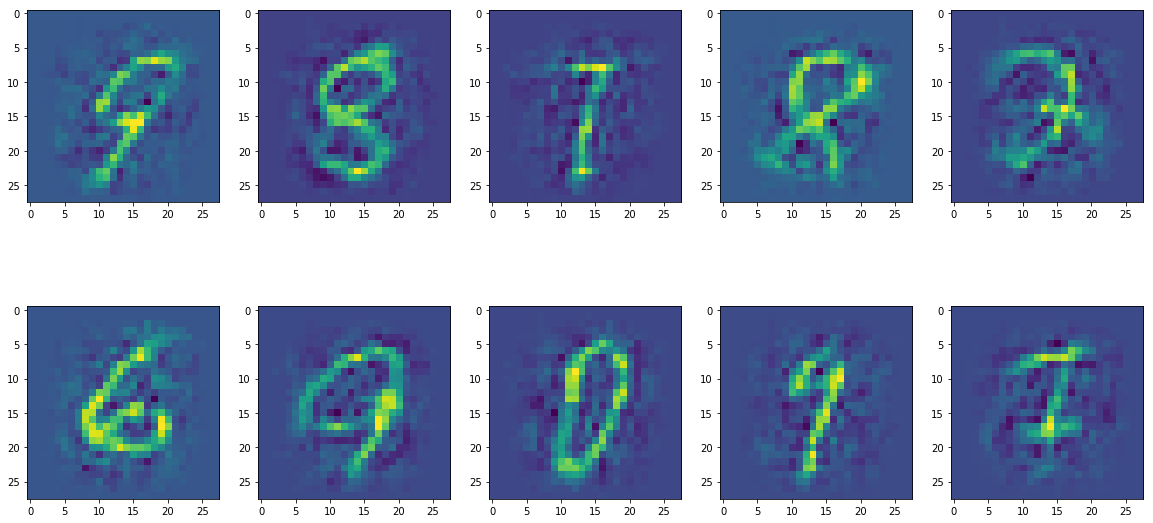

10 First val images, k =100


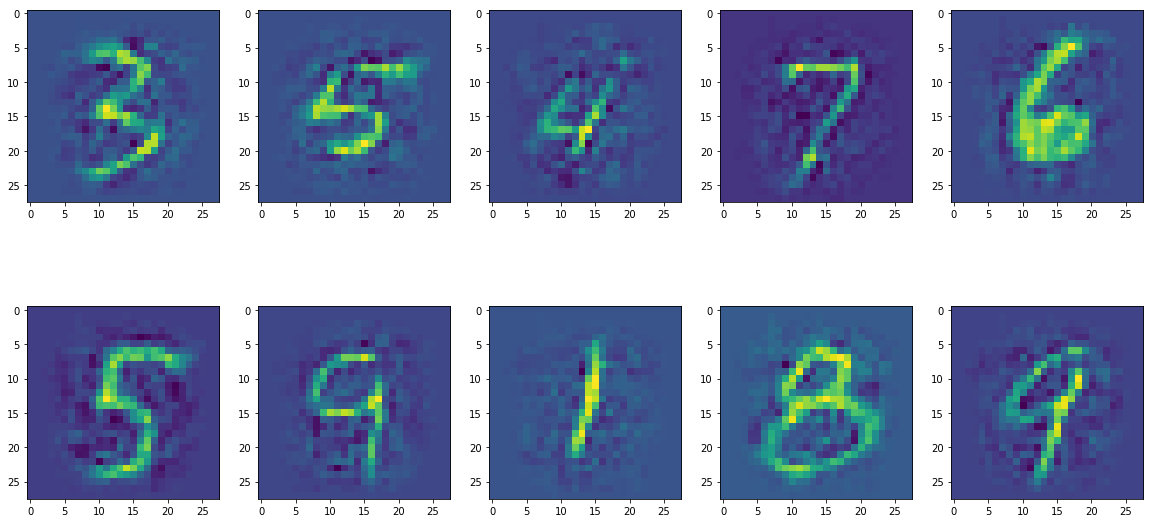

10 First real train images, k =100


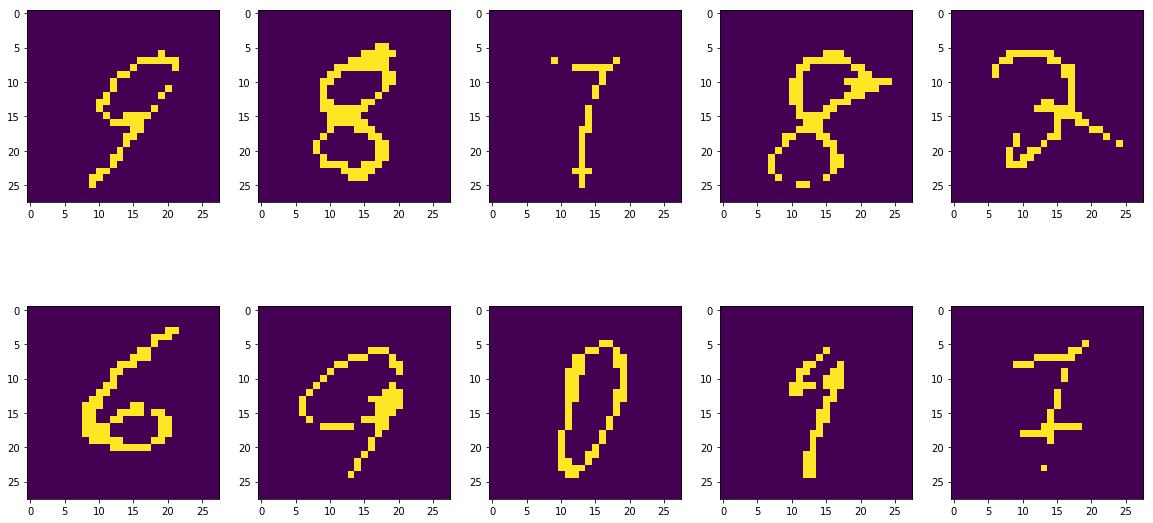

10 First real val images, k =100


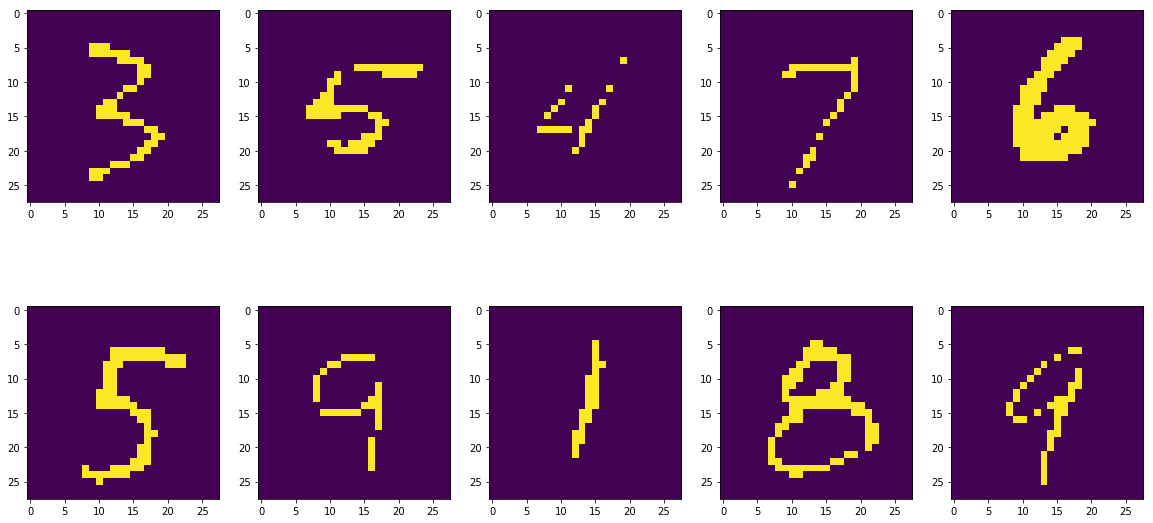

In [115]:
train_AE(X, k = 100) 

('Epoch = ', 0, ' loss train = ', 0.020768212, ' loss val = ', 0.02372909)
('Epoch = ', 1, ' loss train = ', 0.021879515, ' loss val = ', 0.023433916)
('Epoch = ', 2, ' loss train = ', 0.021174442, ' loss val = ', 0.024343226)
('Epoch = ', 3, ' loss train = ', 0.020133855, ' loss val = ', 0.022350064)
('Epoch = ', 4, ' loss train = ', 0.021435522, ' loss val = ', 0.024925485)
('Epoch = ', 5, ' loss train = ', 0.021046158, ' loss val = ', 0.024248447)
('Epoch = ', 6, ' loss train = ', 0.021859093, ' loss val = ', 0.023097223)
('Epoch = ', 7, ' loss train = ', 0.020633491, ' loss val = ', 0.023594065)
('Epoch = ', 8, ' loss train = ', 0.019614374, ' loss val = ', 0.023211852)
('Epoch = ', 9, ' loss train = ', 0.021801788, ' loss val = ', 0.023180407)


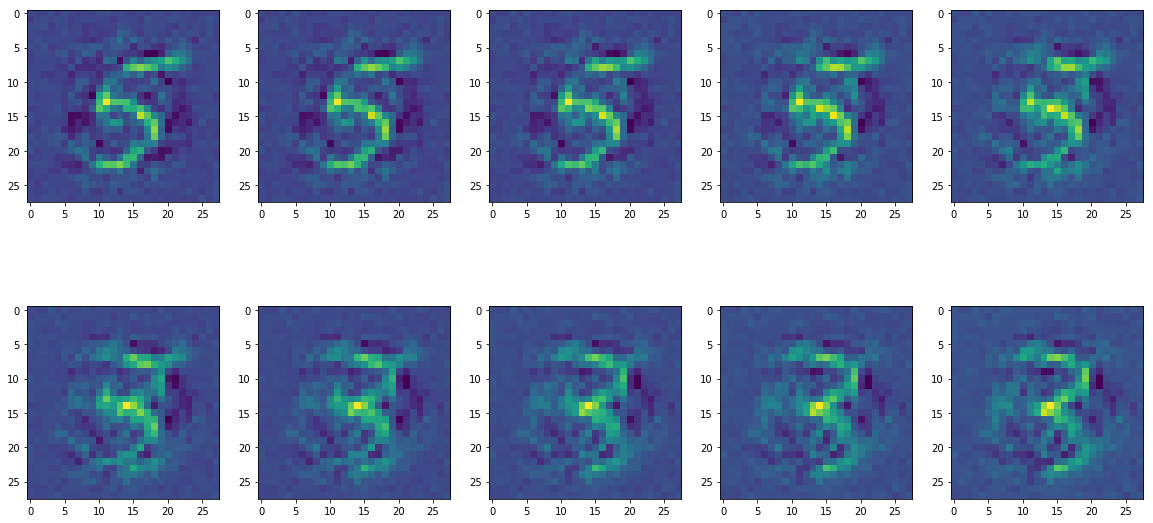

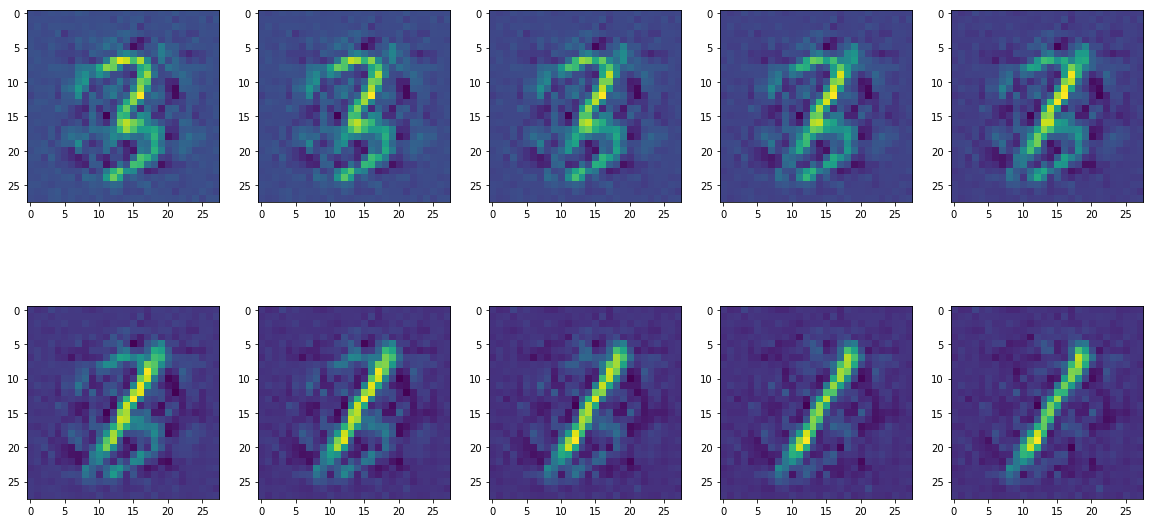

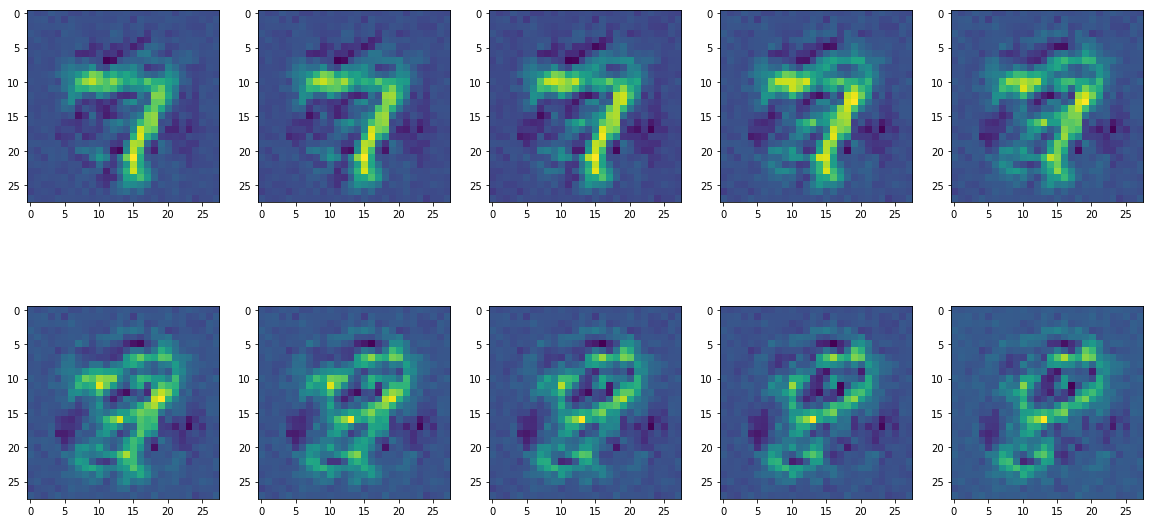

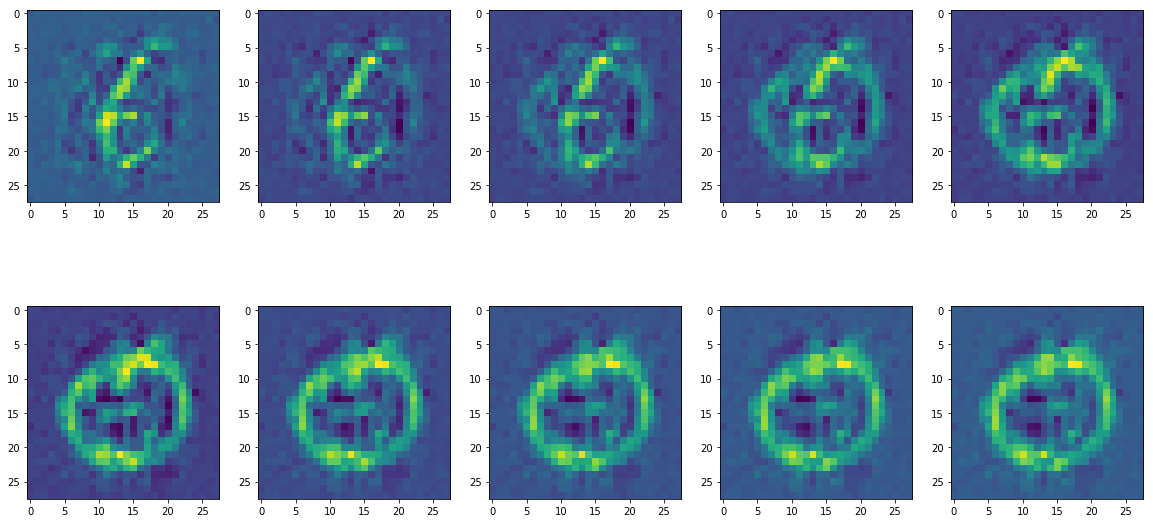

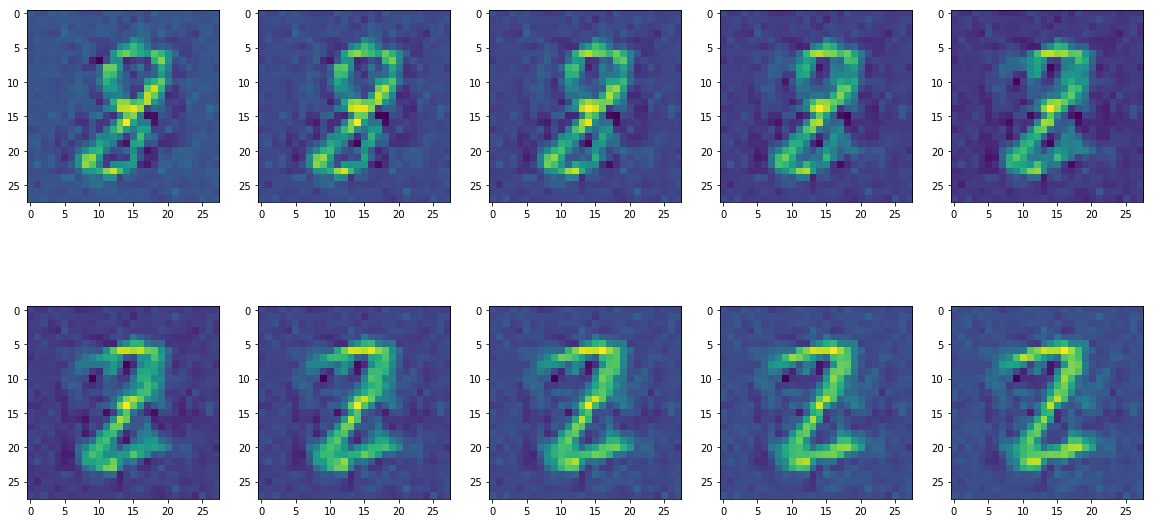

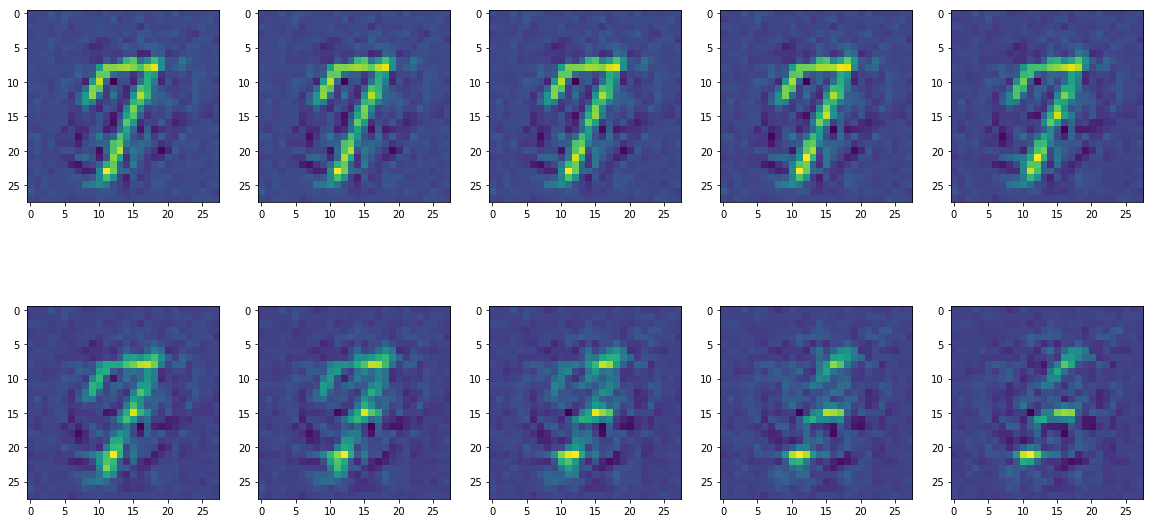

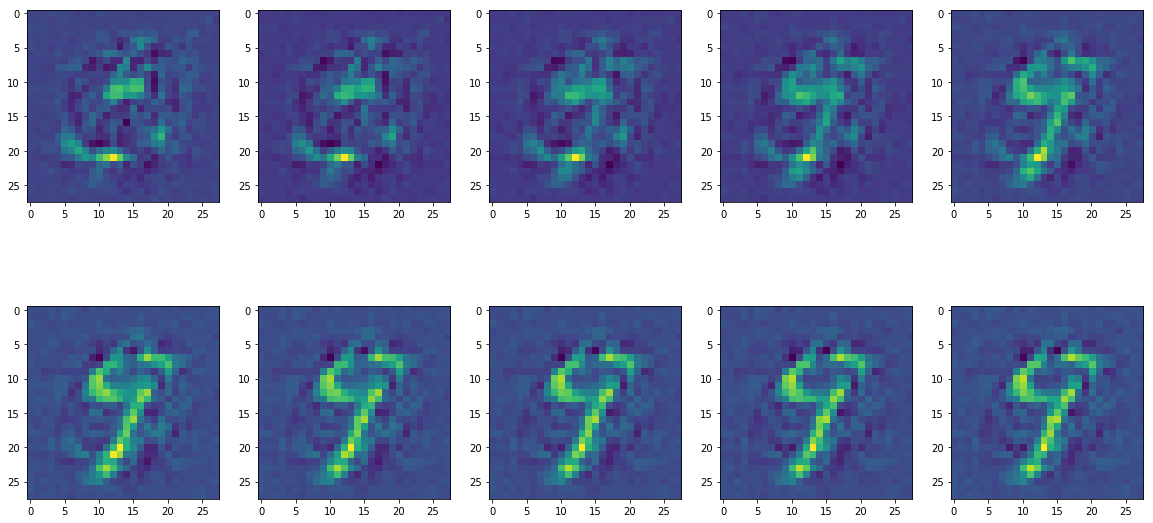

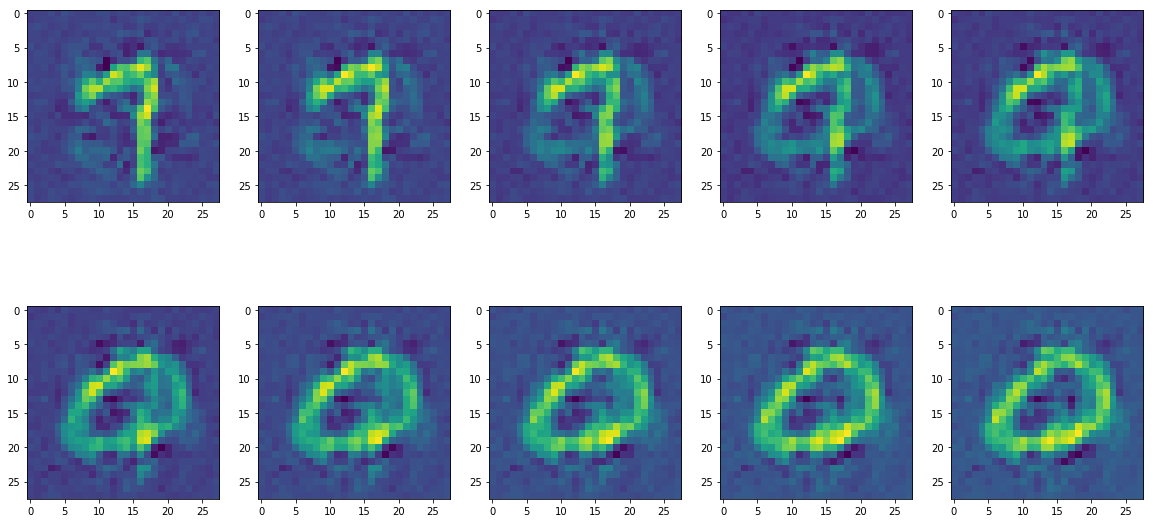

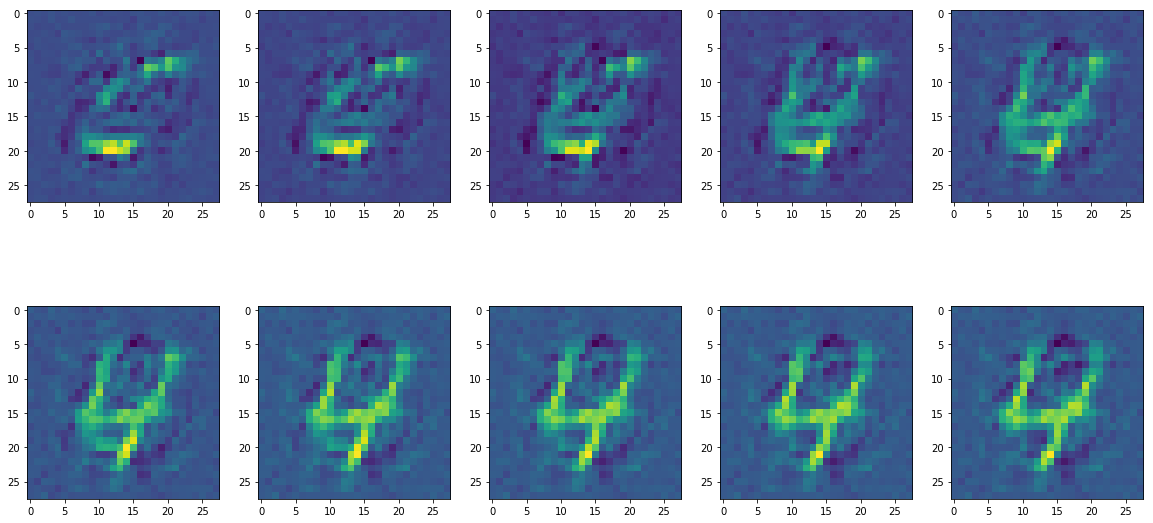

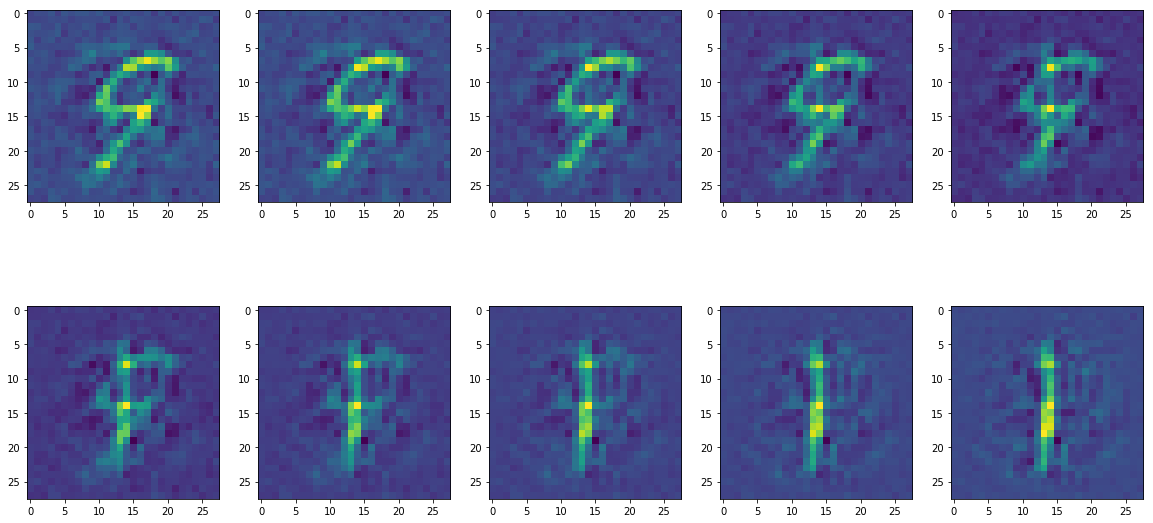

(<tensorflow.python.client.session.Session at 0x7feb2f52c6d0>,
 <tf.Tensor 'dense/BiasAdd:0' shape=(?, 100) dtype=float32>,
 <tf.Tensor 'Reshape:0' shape=(?, 28, 28) dtype=float32>)

In [153]:
train_AE(X, k = 100, visualize = False)

In [171]:
train_AE(X, k = 100)

('Epoch = ', 0, ' loss train = ', 0.019800693, ' loss val = ', 0.023604088)
('Epoch = ', 1, ' loss train = ', 0.021125464, ' loss val = ', 0.023090394)
('Epoch = ', 2, ' loss train = ', 0.020300603, ' loss val = ', 0.024223529)
('Epoch = ', 3, ' loss train = ', 0.022397375, ' loss val = ', 0.023631474)
('Epoch = ', 4, ' loss train = ', 0.022750136, ' loss val = ', 0.02441187)
('Epoch = ', 5, ' loss train = ', 0.020006776, ' loss val = ', 0.023453105)
('Epoch = ', 6, ' loss train = ', 0.022353675, ' loss val = ', 0.024884075)
('Epoch = ', 7, ' loss train = ', 0.018080134, ' loss val = ', 0.022123443)
('Epoch = ', 8, ' loss train = ', 0.023699924, ' loss val = ', 0.024412515)
('Epoch = ', 9, ' loss train = ', 0.021882318, ' loss val = ', 0.022264719)
10 First train images, k =100
10 First val images, k =100
10 First real train images, k =100
10 First real val images, k =100
